Objective

To build a machine learning model that predicts whether a given song will be popular (high popularity) or not popular (low popularity) based on its audio features and metadata.

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,  mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [78]:
high = pd.read_csv("/Users/apple/Desktop/Machine-Learning/csv's/high_popularity_spotify_data.csv")
low =  pd.read_csv("/Users/apple/Desktop/Machine-Learning/csv's/low_popularity_spotify_data.csv")

low["popularity_label"] = 0   # low popularity
high["popularity_label"] = 1  # high popularity

# Align columns
common_cols = list(set(low.columns).intersection(set(high.columns)))

# Concatenate vertically (stack)
data = pd.concat([low[common_cols], high[common_cols]], ignore_index=True)

print(data.shape)
data.head(10)


(4831, 30)


,time_signature,acousticness,speechiness,track_album_id,danceability,playlist_id,duration_ms,instrumentalness,loudness,analysis_url,...,playlist_genre,type,playlist_subgenre,track_popularity,playlist_name,track_id,popularity_label,track_artist,mode,key
0,4.0,0.0648,0.0393,4A8gFwqd9jTtnsNwUu3OQx,0.636,37i9dQZF1DWXRqgorJj26U,138053.0,0.290000,-3.785,https://api.spotify.com/v1/audio-analysis/5e6x...,...,rock,audio_features,classic,23,Rock Classics,5e6x5YRnMJIKvYpZxLqdpH,0,Creedence Clearwater Revival,1.0,0.0
1,4.0,0.1710,0.0317,2c965LEDRNrXXCeBOAAwns,0.572,37i9dQZF1DWXRqgorJj26U,241600.0,0.000377,-6.219,https://api.spotify.com/v1/audio-analysis/5FqY...,...,rock,audio_features,classic,53,Rock Classics,5FqYA8KfiwsQvyBI4IamnY,0,Van Halen,1.0,0.0
2,4.0,0.3270,0.0454,3S404OgKoVQSJ3xXrDVlp8,0.591,37i9dQZF1DWXRqgorJj26U,329413.0,0.000006,-7.299,https://api.spotify.com/v1/audio-analysis/5LNi...,...,rock,audio_features,classic,55,Rock Classics,5LNiqEqpDc8TuqPy79kDBu,0,Stevie Nicks,1.0,0.0
3,4.0,0.9130,0.1010,1y5KGkUKO0NG32MhIIagCA,0.443,37i9dQZF1DXbITWG1ZJKYt,185160.0,0.000000,-17.042,https://api.spotify.com/v1/audio-analysis/78MI...,...,jazz,audio_features,classic,64,Jazz Classics,78MI7mu1LV1k4IA2HzKmHe,0,"Ella Fitzgerald, Louis Armstrong",1.0,0.0
4,4.0,0.7850,0.0298,6f4b9wVTkKAf096k4XG6x5,0.685,37i9dQZF1DXbITWG1ZJKYt,205720.0,0.284000,-9.691,https://api.spotify.com/v1/audio-analysis/6MN6...,...,jazz,audio_features,classic,62,Jazz Classics,6MN6yRVriszuyAVlyF8ndB,0,Galt MacDermot,0.0,9.0
5,4.0,0.5250,0.0566,7gmak9ZGm10y4PtZa9SBQn,0.670,37i9dQZF1DXbITWG1ZJKYt,147147.0,0.000000,-10.158,https://api.spotify.com/v1/audio-analysis/2dR5...,...,jazz,audio_features,classic,61,Jazz Classics,2dR5WkrpwylTuT3jRWNufa,0,"Frank Sinatra, Count Basie",1.0,0.0
6,4.0,0.7060,0.0914,2uqlkJu6vckJahCsp6Hfcn,0.663,37i9dQZF1DXbITWG1ZJKYt,354533.0,0.000000,-14.571,https://api.spotify.com/v1/audio-analysis/33jt...,...,jazz,audio_features,classic,60,Jazz Classics,33jt3kYWjQzqn3xyYQ5ZEh,0,"Ella Fitzgerald, Louis Armstrong",1.0,0.0
7,4.0,0.8360,0.0373,33oCBSZiLbfqyOnTTQ4Tct,0.525,37i9dQZF1DXbITWG1ZJKYt,195533.0,0.079900,-11.065,https://api.spotify.com/v1/audio-analysis/1xUJ...,...,jazz,audio_features,classic,55,Jazz Classics,1xUJ1mdLAysxNBtO9w3J2g,0,Benny Goodman,0.0,10.0
8,4.0,0.9850,0.0363,4B0pF1WLB3pCaZ4eTx5U8S,0.336,37i9dQZF1DXbITWG1ZJKYt,190400.0,0.891000,-20.494,https://api.spotify.com/v1/audio-analysis/3GOZ...,...,jazz,audio_features,classic,54,Jazz Classics,3GOZbK2epuHzCt5YvvVFHO,0,Kenny Dorham,0.0,5.0
9,4.0,0.7940,0.0407,4LEnATSqKeANOJ0mLUAuCE,0.742,37i9dQZF1DXbITWG1ZJKYt,438280.0,0.004410,-8.142,https://api.spotify.com/v1/audio-analysis/1CDB...,...,jazz,audio_features,classic,53,Jazz Classics,1CDBaGlisZlOJzvx88lL8A,0,Horace Silver,0.0,5.0


In [79]:
data.isnull().sum().sort_values(ascending=False)

time_signature              1
acousticness                1
speechiness                 1
danceability                1
instrumentalness            1
duration_ms                 1
track_album_name            1
uri                         1
loudness                    1
analysis_url                1
liveness                    1
valence                     1
id                          1
track_href                  1
type                        1
tempo                       1
key                         1
energy                      1
mode                        1
track_album_release_date    0
track_album_id              0
playlist_id                 0
playlist_genre              0
track_name                  0
playlist_subgenre           0
track_popularity            0
track_id                    0
playlist_name               0
track_artist                0
popularity_label            0
dtype: int64

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4831 entries, 0 to 4830
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time_signature            4830 non-null   float64
 1   acousticness              4830 non-null   float64
 2   speechiness               4830 non-null   float64
 3   track_album_id            4831 non-null   object 
 4   danceability              4830 non-null   float64
 5   playlist_id               4831 non-null   object 
 6   duration_ms               4830 non-null   float64
 7   instrumentalness          4830 non-null   float64
 8   loudness                  4830 non-null   float64
 9   analysis_url              4830 non-null   object 
 10  track_album_name          4830 non-null   object 
 11  uri                       4830 non-null   object 
 12  liveness                  4830 non-null   float64
 13  track_album_release_date  4831 non-null   object 
 14  track_na

In [81]:
scalar = StandardScaler()
for col in data.columns:
    if col != "popularity_label" and data[col].dtype in ["float64", "int64"]:  # skip target col
        # fill missing values with mean
        data[col] = data[col].fillna(data[col].mean())
        
        # scale (keep 2D input for scaler)
        data[col] = scalar.fit_transform(data[[col]])

for col in data.columns:
    if data[col].dtype in ["object"]:  # handle both numeric
        # handle missing values → here I'm filling with the column mean
        data[col] = data[col].fillna(data[col].mode()[0])  


In [82]:
data.head()

,time_signature,acousticness,speechiness,track_album_id,danceability,playlist_id,duration_ms,instrumentalness,loudness,analysis_url,...,playlist_genre,type,playlist_subgenre,track_popularity,playlist_name,track_id,popularity_label,track_artist,mode,key
0,0.154663,-0.849691,-0.618137,4A8gFwqd9jTtnsNwUu3OQx,0.072944,37i9dQZF1DWXRqgorJj26U,-0.833219,0.252803,0.771140,https://api.spotify.com/v1/audio-analysis/5e6x...,...,rock,audio_features,classic,-1.601952,Rock Classics,5e6x5YRnMJIKvYpZxLqdpH,0,Creedence Clearwater Revival,0.882704,-1.461778
1,0.154663,-0.523238,-0.693376,2c965LEDRNrXXCeBOAAwns,-0.268086,37i9dQZF1DWXRqgorJj26U,0.433743,-0.570352,0.429666,https://api.spotify.com/v1/audio-analysis/5FqY...,...,rock,audio_features,classic,-0.088827,Rock Classics,5FqYA8KfiwsQvyBI4IamnY,0,Van Halen,0.882704,-1.461778
2,0.154663,-0.043702,-0.557747,3S404OgKoVQSJ3xXrDVlp8,-0.166843,37i9dQZF1DWXRqgorJj26U,1.508188,-0.571406,0.278149,https://api.spotify.com/v1/audio-analysis/5LNi...,...,rock,audio_features,classic,0.012048,Rock Classics,5LNiqEqpDc8TuqPy79kDBu,0,Stevie Nicks,0.882704,-1.461778
3,0.154663,1.757630,-0.007311,1y5KGkUKO0NG32MhIIagCA,-0.955475,37i9dQZF1DXbITWG1ZJKYt,-0.256836,-0.571423,-1.088729,https://api.spotify.com/v1/audio-analysis/78MI...,...,jazz,audio_features,classic,0.465986,Jazz Classics,78MI7mu1LV1k4IA2HzKmHe,0,"Ella Fitzgerald, Louis Armstrong",0.882704,-1.461778
4,0.154663,1.364165,-0.712186,6f4b9wVTkKAf096k4XG6x5,0.334045,37i9dQZF1DXbITWG1ZJKYt,-0.005271,0.235750,-0.057432,https://api.spotify.com/v1/audio-analysis/6MN6...,...,jazz,audio_features,classic,0.365111,Jazz Classics,6MN6yRVriszuyAVlyF8ndB,0,Galt MacDermot,-1.133117,1.052108


In [83]:
encoder = LabelEncoder()  # initialize once

for col in data.columns:
    if col in ["playlist_genre", "playlist_subgenre"]:   # ✅ check column name directly
        # fit & transform this column
        data[col] = encoder.fit_transform(data[[col]])  # use double brackets to keep it 2D
        


/Users/apple/Desktop/Machine-Learning/venv/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/apple/Desktop/Machine-Learning/venv/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [84]:
data.shape

(4831, 30)


Confusion Matrix:
 [[580  60]
 [ 90 237]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       640
           1       0.80      0.72      0.76       327

    accuracy                           0.84       967
   macro avg       0.83      0.82      0.82       967
weighted avg       0.84      0.84      0.84       967



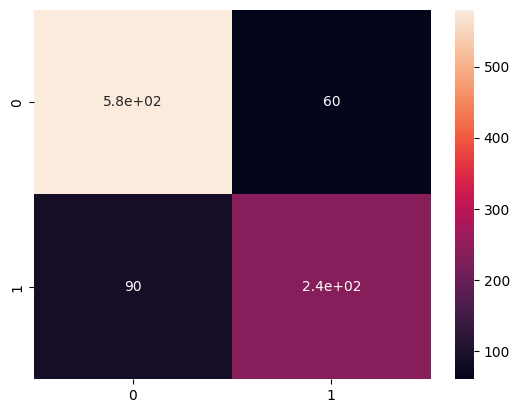

Accuracy: 0.8448810754912099


In [85]:
drop_cols = [
    "track_album_name",
    "track_album_id",
    "playlist_id",
    "analysis_url",
    "uri",
    "track_album_release_date",
    "track_name",
    "track_href",
    "id",
    "playlist_name",
    "track_id",
    "track_artist",
    "type",
    "popularity_label",
    "track_popularity"
]

X = data.drop(columns=drop_cols)  # features
y = data["popularity_label"]  # target
# Double-check: all numeric now

# Split
train_X, test_X, train_Y, test_Y = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(train_X, train_Y)

# Predictions
y_pred = model.predict(test_X)
print("\nConfusion Matrix:\n", confusion_matrix(test_Y, y_pred))
print("\nClassification Report:\n", classification_report(test_Y, y_pred))
sns.heatmap(data=confusion_matrix(test_Y, y_pred), annot=True)
plt.show()

# Accuracy
print("Accuracy:", accuracy_score(test_Y, y_pred))

In [86]:
import joblib

joblib.dump(model, "/Users/apple/Desktop/Machine-Learning/saved-models/Spotify_songs_Popularity_classification_model.pkl")


['/Users/apple/Desktop/Machine-Learning/saved-models/Spotify_songs_Popularity_classification_model.pkl']